# Stroke Prediction


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient




## Data cleaning

In [1]:
# Load the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
del df['id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [3]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


We have NaN data in bmi, for now let's do an EDA 

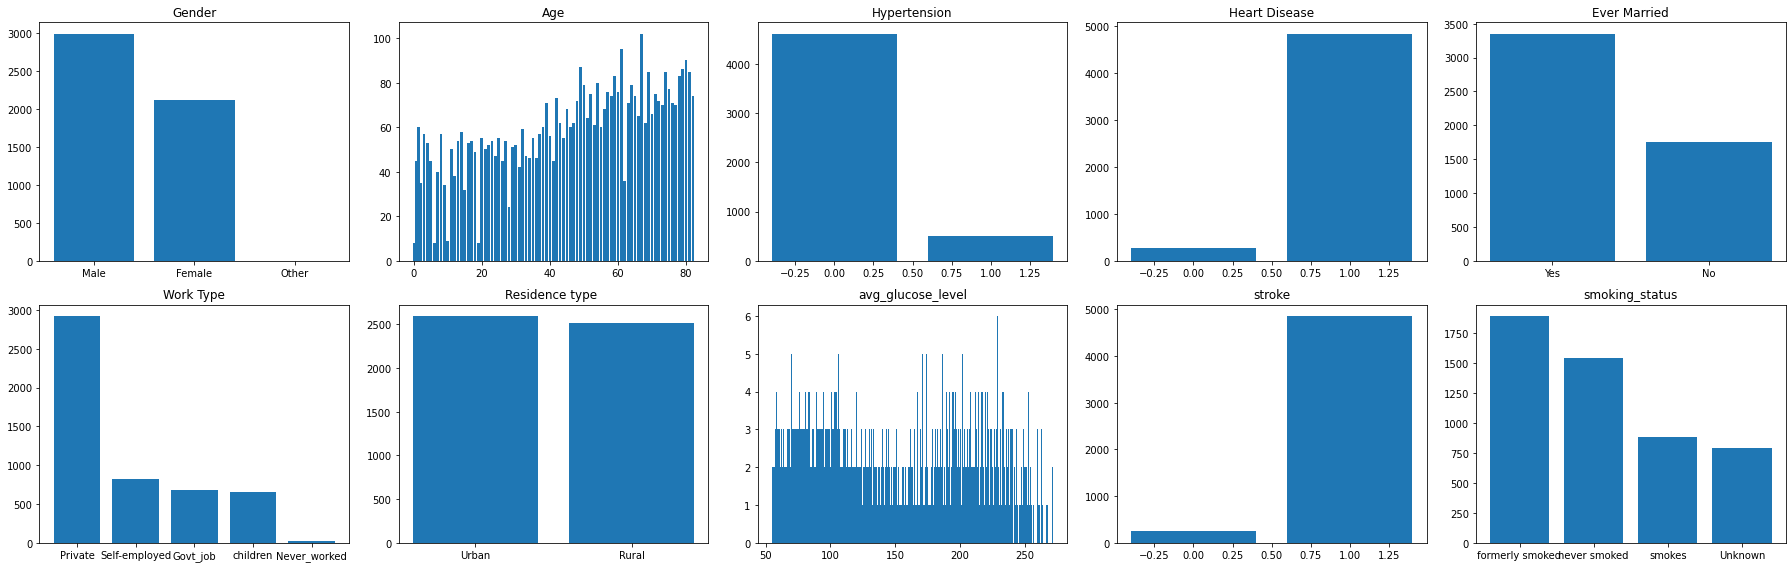

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5)
axs[0, 0].bar(df.gender.unique(),  df.gender.value_counts())
axs[0, 0].set_title('Gender')
axs[0, 1].bar(df.age.unique(),  df.age.value_counts())
axs[0, 1].set_title('Age')
axs[0, 2].bar(df.hypertension.unique(),  df.hypertension.value_counts())
axs[0, 2].set_title('Hypertension')
axs[0, 3].bar(df.heart_disease.unique(),  df.heart_disease.value_counts())
axs[0, 3].set_title('Heart Disease')
axs[0, 4].bar(df.ever_married.unique(),  df.ever_married.value_counts())
axs[0, 4].set_title('Ever Married')
axs[1, 0].bar(df.work_type.unique(),  df.work_type.value_counts())
axs[1, 0].set_title('Work Type')
axs[1, 1].bar(df.Residence_type.unique(),  df.Residence_type.value_counts())
axs[1, 1].set_title('Residence type ')
axs[1, 2].bar(df.avg_glucose_level.unique(),  df.avg_glucose_level.value_counts())
axs[1, 2].set_title('avg_glucose_level')
axs[1, 3].bar(df.stroke.unique(),  df.stroke.value_counts())
axs[1, 3].set_title('stroke')
axs[1, 4].bar(df.smoking_status.unique(),  df.smoking_status.value_counts())
axs[1, 4].set_title('smoking_status')
fig.set_figheight(8)
fig.set_figwidth(25)
fig.tight_layout()
fig.show()

**We can see that our dataset is imbalanced on stroke subjects**

In [5]:
import numpy as np

neg, pos = np.bincount(df['stroke'])
total = neg + pos
print('Examples:\n    Total: {}\n    Stroke: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 5110
    Stroke: 249 (4.87% of total)



Now we can encode our categorical variables

In [6]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df_encoded = df.apply(le.fit_transform)
df_encoded

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,475,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,476,2,0
5106,0,102,0,0,1,3,1,3030,273,2,0
5107,0,56,0,0,1,3,0,1314,179,2,0
5108,1,72,0,0,1,2,0,3363,129,1,0


In [8]:
# Scaling
from sklearn.preprocessing import StandardScaler

features = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi', 'smoking_status']
ft_to_scale = ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']
scaler = StandardScaler()
df_encoded[ft_to_scale] = scaler.fit_transform(df_encoded[ft_to_scale])

In [9]:
df_encoded

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.039513,0,1,1,-0.153836,1,1.780170,0.627387,-0.351781,1
1,0,0.779567,0,0,1,0.763438,0,1.543029,2.945513,0.581552,1
2,1,1.602729,0,1,1,-0.153836,0,0.542872,0.224662,0.581552,1
3,0,0.259675,0,0,1,-0.153836,1,1.359290,0.411291,1.514885,1
4,0,1.559405,1,0,1,0.763438,0,1.367436,-0.610256,0.581552,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.602729,1,0,1,-0.153836,1,-0.473576,2.955335,0.581552,0
5106,0,1.646054,0,0,1,0.763438,1,1.037972,0.961354,0.581552,0
5107,0,-0.346866,0,0,1,0.763438,0,-0.515212,0.038033,0.581552,0
5108,1,0.346323,0,0,1,-0.153836,0,1.339377,-0.453095,-0.351781,0


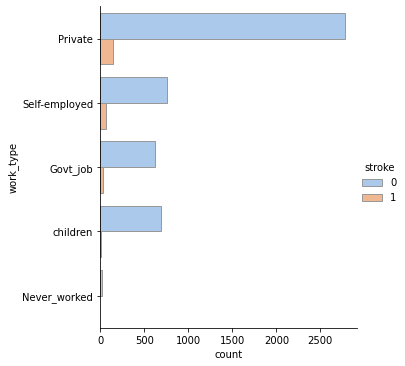

In [10]:
import seaborn as sns
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

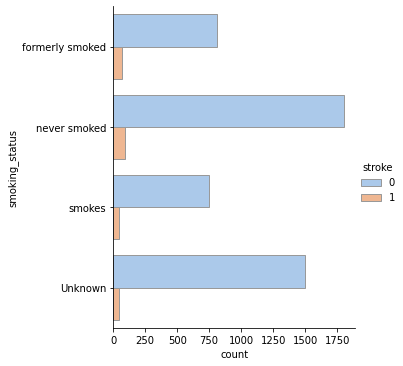

In [11]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

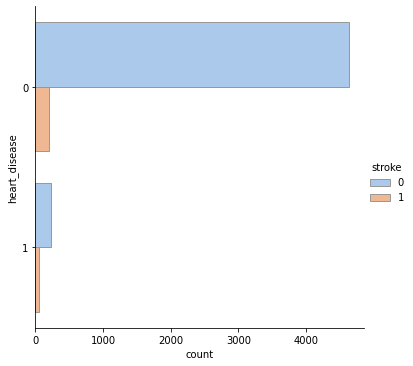

In [12]:
sns.catplot(y="heart_disease", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

We can see from the previous plot that there is some sort of correlation between heart disease history and stroke occurrancies. 
Instead, in this dataset we don't have a major incidence of strokes with smokers. Probably due to the lack of data. 

Deal with NaN values


In [13]:
column_means = df_encoded.bmi.mean()
df_encoded.bmi = df_encoded.bmi.fillna(column_means)

In [14]:
!pip install heatmapz


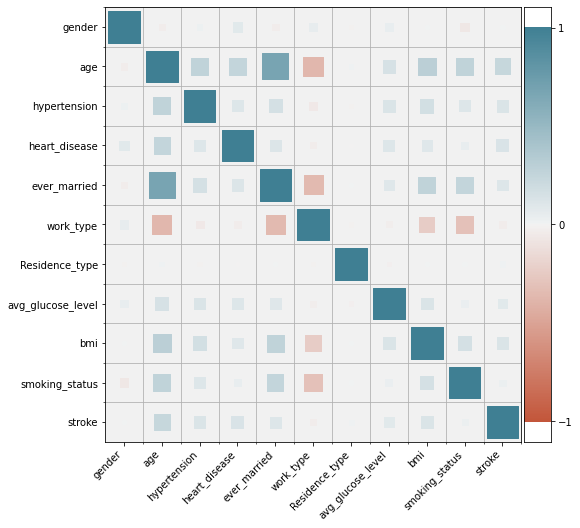

In [15]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
corrplot(df_encoded.corr(), size_scale=1000);

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 439.3 KB


In [17]:
df_encoded.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5.110000e+03,5110.000000,5110.000000,5110.000000,5.110000e+03,5110.000000,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000
mean,0.414286,3.058640e-16,0.097456,0.054012,0.656164,1.167581e-16,0.508023,-4.956896e-17,-1.767884e-16,2.602832e-17,0.048728
std,0.493044,1.000098e+00,0.296607,0.226063,0.475034,1.000098e+00,0.499985,1.000098e+00,1.000098e+00,1.000098e+00,0.215320
min,0.000000,-2.773029e+00,0.000000,0.000000,0.000000,-1.988384e+00,0.000000,-1.704538e+00,-1.720206e+00,-1.285114e+00,0.000000
25%,0.000000,-7.801094e-01,0.000000,0.000000,0.000000,-1.538364e-01,0.000000,-8.272516e-01,-6.299014e-01,-1.285114e+00,0.000000
50%,0.000000,8.637737e-02,0.000000,0.000000,1.000000,-1.538364e-01,1.000000,-6.491510e-02,-1.780633e-01,5.815523e-01,0.000000
75%,1.000000,7.795668e-01,0.000000,0.000000,1.000000,7.634376e-01,1.000000,8.171234e-01,3.720004e-01,5.815523e-01,0.000000
max,2.000000,1.689378e+00,1.000000,1.000000,1.000000,1.680712e+00,1.000000,1.896025e+00,4.350140e+00,1.514885e+00,1.000000


We have an imbalanced dataset, we can apply SMOTE technique

In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded[features]
y = df_encoded['stroke']
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3577, 10)
Number transactions y_train dataset:  (3577,)
Number transactions X_test dataset:  (1533, 10)
Number transactions y_test dataset:  (1533,)


In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (6808, 10)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1457
           1       0.14      0.74      0.23        76

    accuracy                           0.75      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.75      0.82      1533



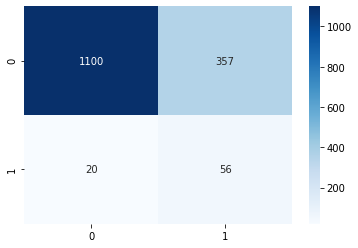

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)
Y_pred = log_reg.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1457
           1       0.13      0.58      0.21        76

    accuracy                           0.79      1533
   macro avg       0.55      0.69      0.54      1533
weighted avg       0.93      0.79      0.84      1533



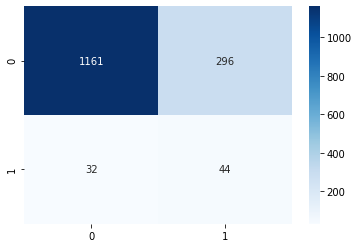

In [22]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_res, y_train_res)
Y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1457
           1       0.07      0.04      0.05        76

    accuracy                           0.93      1533
   macro avg       0.51      0.51      0.51      1533
weighted avg       0.91      0.93      0.92      1533



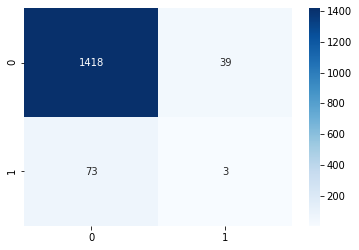

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state = 1, criterion='gini')
# Train the model on training data
rf.fit(X_train_res, y_train_res)
Y_pred = rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)


**LogisticRegression** gives best results for F1 score, let's tune it!

In [25]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0],'solver': ['liblinear','lbfgs']}])]
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy')
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
Best Accuracy : 79.54%
Best Parameters :  {'C': 0.25, 'random_state': 0, 'solver': 'liblinear'}

----------------



In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1457
           1       0.14      0.74      0.23        76

    accuracy                           0.76      1533
   macro avg       0.56      0.75      0.54      1533
weighted avg       0.94      0.76      0.82      1533

ROC AUC score: 0.8197991547158905
Accuracy Score:  0.7560339204174821
F1 Score:  0.23045267489711935
Recall:  0.7368421052631579


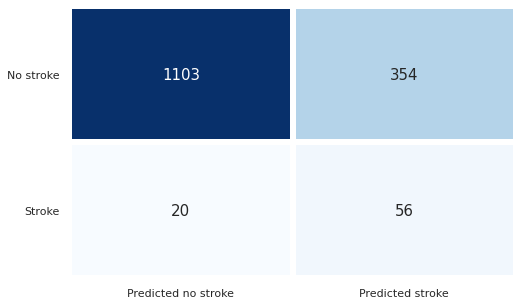

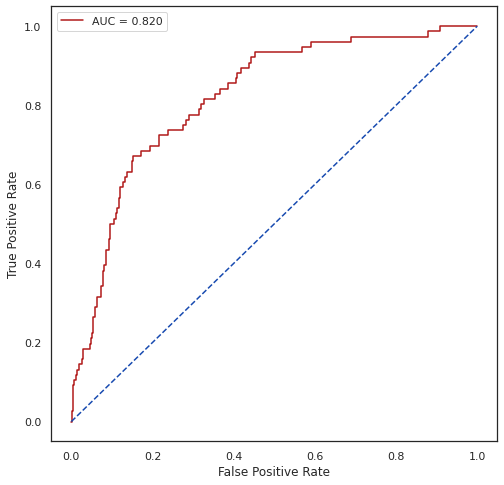

In [33]:
#Using best fit parameters
classifier = LogisticRegression(C= 0.25, random_state= 0, solver= 'liblinear')
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**82% AUC** **75.6% Accuracy** **73.68% Recall** 